<a href="https://colab.research.google.com/github/HScodes05/JOB-PLACEMENT-PREDICTION-model/blob/main/JOB_PREDICTION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import ipywidgets as widgets
from IPython.display import display, clear_output


In [2]:

df = pd.read_csv("Placement_Data1.csv")
df.head()


,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,active_backlog,skills,soft_skills,status
0,Male,69.97,Others,58.16,Central,Arts,72.53,Comm&Mgmt,No,42.02,Mkt&Fin,61.88,1,"Machine Learning, C++",NaN,0
1,Male,63.62,Others,77.64,Others,Science,64.44,Comm&Mgmt,No,62.53,Mkt&HR,78.16,0,"Data Analysis, Excel, HTML, SQL","Time Management, Teamwork, Communication",1
2,Female,71.48,Central,73.83,Others,Commerce,68.65,Comm&Mgmt,No,44.26,Mkt&HR,66.95,0,"Python, Java, C++, CSS","Time Management, Teamwork",0
3,Female,80.23,Others,65.79,Others,Science,62.87,Sci&Tech,Yes,72.86,Mkt&HR,69.60,0,"C++, SQL, Data Analysis","Leadership, Communication, Teamwork",1
4,Male,62.66,Central,67.44,Others,Science,60.19,Sci&Tech,No,68.43,Mkt&HR,62.90,0,"CSS, HTML",Leadership,1


In [3]:
df.tail(5)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,active_backlog,skills,soft_skills,status
26995,Female,72.38,Others,53.00,Others,Arts,76.88,Sci&Tech,Yes,74.13,Mkt&HR,83.58,0,"CSS, C++, Machine Learning","Communication, Leadership",1
26996,Male,66.16,Others,84.22,Central,Arts,70.64,Sci&Tech,Yes,57.32,Mkt&Fin,84.24,1,"Data Analysis, C++, Java, Python",Leadership,0
26997,Female,57.24,Others,77.86,Others,Science,60.13,Sci&Tech,No,71.07,Mkt&HR,69.02,0,"CSS, Excel",NaN,0
26998,Male,66.20,Central,78.31,Central,Commerce,70.33,Comm&Mgmt,No,84.49,Mkt&HR,69.15,1,"Python, Machine Learning, HTML, CSS","Leadership, Teamwork, Communication",0
26999,Male,58.93,Central,76.36,Central,Science,66.80,Comm&Mgmt,No,55.05,Mkt&HR,62.51,1,"Java, CSS, SQL","Problem Solving, Communication, Leadership",0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               27000 non-null  object 
 1   ssc_percentage       27000 non-null  float64
 2   ssc_board            27000 non-null  object 
 3   hsc_percentage       27000 non-null  float64
 4   hsc_board            27000 non-null  object 
 5   hsc_subject          27000 non-null  object 
 6   degree_percentage    27000 non-null  float64
 7   undergrad_degree     27000 non-null  object 
 8   work_experience      27000 non-null  object 
 9   emp_test_percentage  27000 non-null  float64
 10  specialisation       27000 non-null  object 
 11  mba_percent          27000 non-null  float64
 12  active_backlog       27000 non-null  int64  
 13  skills               21669 non-null  object 
 14  soft_skills          20245 non-null  object 
 15  status               27000 non-null 

In [5]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,active_backlog,status
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,65.029569,65.964811,67.018536,65.015403,68.033976,0.709259,0.120852
std,9.952693,10.003151,8.020032,9.992790,6.992597,0.905140,0.325961
min,35.000000,35.000000,40.000000,30.000000,45.000000,0.000000,0.000000
25%,58.290000,59.147500,61.600000,58.260000,63.370000,0.000000,0.000000
50%,65.060000,65.990000,67.050000,65.030000,68.010000,0.000000,0.000000
75%,71.750000,72.780000,72.440000,71.700000,72.750000,1.000000,0.000000
max,95.000000,95.000000,95.000000,95.000000,95.000000,3.000000,1.000000


In [6]:

print(df.shape)
print(df.isnull().sum())


(27000, 16)
gender                    0
ssc_percentage            0
ssc_board                 0
hsc_percentage            0
hsc_board                 0
hsc_subject               0
degree_percentage         0
undergrad_degree          0
work_experience           0
emp_test_percentage       0
specialisation            0
mba_percent               0
active_backlog            0
skills                 5331
soft_skills            6755
status                    0
dtype: int64


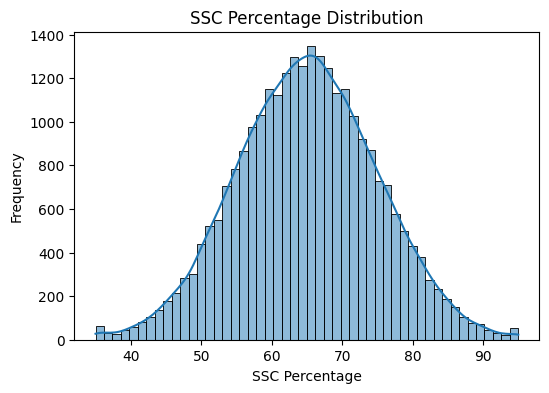

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df["ssc_percentage"], bins=50, kde=True)
plt.title("SSC Percentage Distribution")
plt.xlabel("SSC Percentage")
plt.ylabel("Frequency")
plt.show()

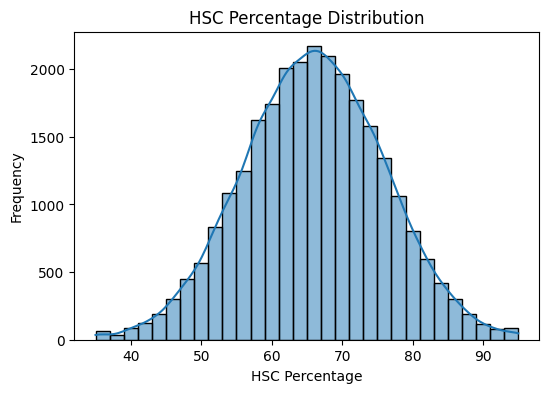

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df["hsc_percentage"], bins=30, kde=True)
plt.title("HSC Percentage Distribution")
plt.xlabel("HSC Percentage")
plt.ylabel("Frequency")
plt.show()

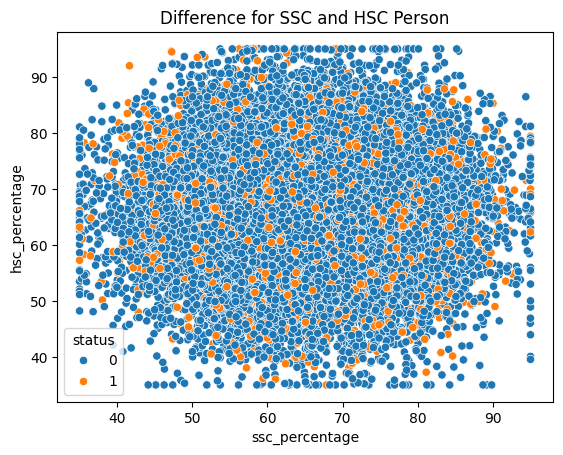

In [9]:
sns.scatterplot(x="ssc_percentage",y="hsc_percentage",data=df,hue="status")
plt.title("Difference for SSC and HSC Person")
plt.show()

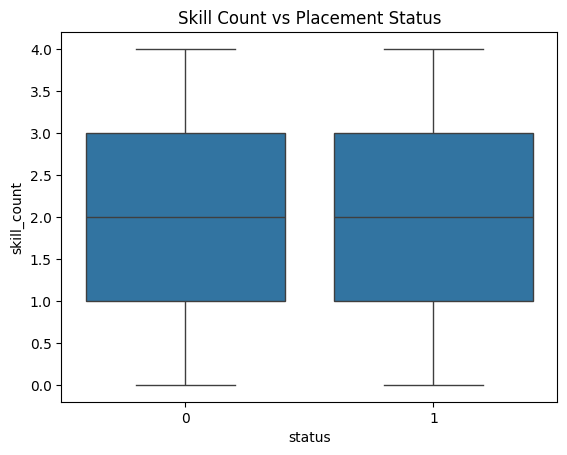

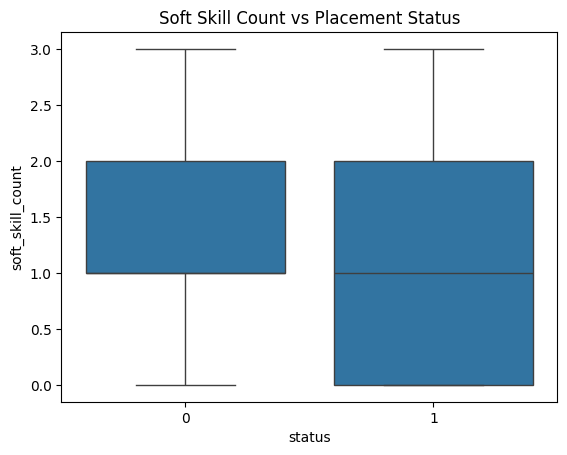

In [10]:

df["skill_count"] = df["skills"].fillna("").apply(
    lambda x: len([s for s in x.split(",") if s.strip() != ""])
)

df["soft_skill_count"] = df["soft_skills"].fillna("").apply(
    lambda x: len([s for s in x.split(",") if s.strip() != ""])
)

#3.2 EDA plots (safe)
sns.boxplot(x="status", y="skill_count", data=df)
plt.title("Skill Count vs Placement Status")
plt.show()

sns.boxplot(x="status", y="soft_skill_count", data=df)
plt.title("Soft Skill Count vs Placement Status")
plt.show()


In [11]:

df_model = df.copy()

df_model.drop(
    columns=["skills", "soft_skills", "skill_count", "soft_skill_count"],
    inplace=True
)


In [12]:
cat_cols = [
    "gender", "ssc_board", "hsc_board", "hsc_subject",
    "undergrad_degree", "work_experience", "specialisation"
]

df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)


In [13]:
X = df_model.drop(columns=["status"])
y = df_model["status"]

feature_columns = X.columns.tolist()


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [15]:
num_cols = [
    "ssc_percentage", "hsc_percentage", "degree_percentage",
    "emp_test_percentage", "mba_percent", "active_backlog"
]

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])


In [16]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=6,
        min_samples_leaf=20,
        random_state=42
    ),
    "SVM (Linear)": SVC(
        kernel="linear",
        probability=True,
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        min_samples_leaf=5,
        class_weight="balanced",
        random_state=42
    )
}

for name, model in models.items():
    model.fit(X_train, y_train)

print("All models trained successfully.")


All models trained successfully.


In [17]:
rf = models["Random Forest"]

In [18]:
output = widgets.Output()

model_selector = widgets.Dropdown(
    options=list(models.keys()),
    value="Random Forest",
    description="Model:"
)
ssc = widgets.FloatText(description="SSC %:")
hsc = widgets.FloatText(description="HSC %:")
degree = widgets.FloatText(description="Degree %:")
emp_test = widgets.FloatText(description="Emp Test %:")
mba = widgets.FloatText(description="MBA %:")
backlogs = widgets.IntText(description="Backlogs:")

gender = widgets.Dropdown(options=["Male","Female"], description="Gender:")
ssc_board = widgets.Dropdown(options=["Central","Others"], description="SSC Board:")
hsc_board = widgets.Dropdown(options=["Central","Others"], description="HSC Board:")
hsc_subject = widgets.Dropdown(options=["Commerce","Science","Arts"], description="HSC Subject:")
ug_degree = widgets.Dropdown(options=["Comm&Mgmt","Sci&Tech","Others"], description="UG Degree:")
work_exp = widgets.Dropdown(options=["Yes","No"], description="Work Exp:")
specialisation = widgets.Dropdown(options=["Mkt&Fin","Mkt&HR"], description="Spec:")

predict_btn = widgets.Button(description="Predict", button_style="success")


def predict_clicked(b):
    with output:
        clear_output()

        if min(ssc.value, hsc.value, degree.value, mba.value, emp_test.value) < 60:
             print("Not Eligible — Percentage below 60%")
             return

        if backlogs.value > 1:
             print("Not Eligible due to active backlogs")
             return


        row = {col: 0 for col in feature_columns}


        row["ssc_percentage"] = ssc.value
        row["hsc_percentage"] = hsc.value
        row["degree_percentage"] = degree.value
        row["emp_test_percentage"] = emp_test.value
        row["mba_percent"] = mba.value
        row["active_backlog"] = backlogs.value


        row[f"gender_{gender.value}"] = 1
        row[f"ssc_board_{ssc_board.value}"] = 1
        row[f"hsc_board_{hsc_board.value}"] = 1
        row[f"hsc_subject_{hsc_subject.value}"] = 1
        row[f"undergrad_degree_{ug_degree.value}"] = 1
        row[f"work_experience_{work_exp.value}"] = 1
        row[f"specialisation_{specialisation.value}"] = 1


        inp = pd.DataFrame([row])[feature_columns]


        inp[num_cols] = scaler.transform(inp[num_cols])

        selected_model = models[model_selector.value]


        pred = selected_model.predict(inp)[0]

        if pred == 1:
           print("Prediction: PLACED")
        else:
           print("Prediction: NOT PLACED")




predict_btn.on_click(predict_clicked)

display(
    model_selector,gender, ssc, ssc_board,
    hsc, hsc_subject, hsc_board,
    degree, ug_degree, work_exp,
    emp_test, specialisation, mba,
    backlogs, predict_btn, output
)

Dropdown(description='Model:', index=4, options=('Logistic Regression', 'KNN', 'Decision Tree', 'SVM (Linear)'…

Dropdown(description='Gender:', options=('Male', 'Female'), value='Male')

FloatText(value=0.0, description='SSC %:')

Dropdown(description='SSC Board:', options=('Central', 'Others'), value='Central')

FloatText(value=0.0, description='HSC %:')

Dropdown(description='HSC Subject:', options=('Commerce', 'Science', 'Arts'), value='Commerce')

Dropdown(description='HSC Board:', options=('Central', 'Others'), value='Central')

FloatText(value=0.0, description='Degree %:')

Dropdown(description='UG Degree:', options=('Comm&Mgmt', 'Sci&Tech', 'Others'), value='Comm&Mgmt')

Dropdown(description='Work Exp:', options=('Yes', 'No'), value='Yes')

FloatText(value=0.0, description='Emp Test %:')

Dropdown(description='Spec:', options=('Mkt&Fin', 'Mkt&HR'), value='Mkt&Fin')

FloatText(value=0.0, description='MBA %:')

IntText(value=0, description='Backlogs:')

Button(button_style='success', description='Predict', style=ButtonStyle())

Output()

In [19]:


results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print("\n==============================")
    print(f"MODEL: {name}")
    print("==============================")
    print(f"Accuracy: {acc*100:.2f}%")

    print("\nClassification Report:")
    print(classification_report(
        y_test, y_pred,
        target_names=["Not Placed", "Placed"],
        zero_division=0
    ))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)



MODEL: Logistic Regression
Accuracy: 87.91%

Classification Report:
              precision    recall  f1-score   support

  Not Placed       0.88      1.00      0.94      7121
      Placed       0.00      0.00      0.00       979

    accuracy                           0.88      8100
   macro avg       0.44      0.50      0.47      8100
weighted avg       0.77      0.88      0.82      8100

Confusion Matrix:
 [[7121    0]
 [ 979    0]]

MODEL: KNN
Accuracy: 87.30%

Classification Report:
              precision    recall  f1-score   support

  Not Placed       0.88      0.99      0.93      7121
      Placed       0.20      0.02      0.03       979

    accuracy                           0.87      8100
   macro avg       0.54      0.50      0.48      8100
weighted avg       0.80      0.87      0.82      8100

Confusion Matrix:
 [[7054   67]
 [ 962   17]]

MODEL: Decision Tree
Accuracy: 87.83%

Classification Report:
              precision    recall  f1-score   support

  Not Placed  

In [20]:

acc_df = pd.DataFrame.from_dict(
    results, orient="index", columns=["Accuracy"]
).sort_values(by="Accuracy", ascending=False)

acc_df


,Accuracy
Logistic Regression,0.879136
SVM (Linear),0.879136
Decision Tree,0.878272
KNN,0.872963
Random Forest,0.790741


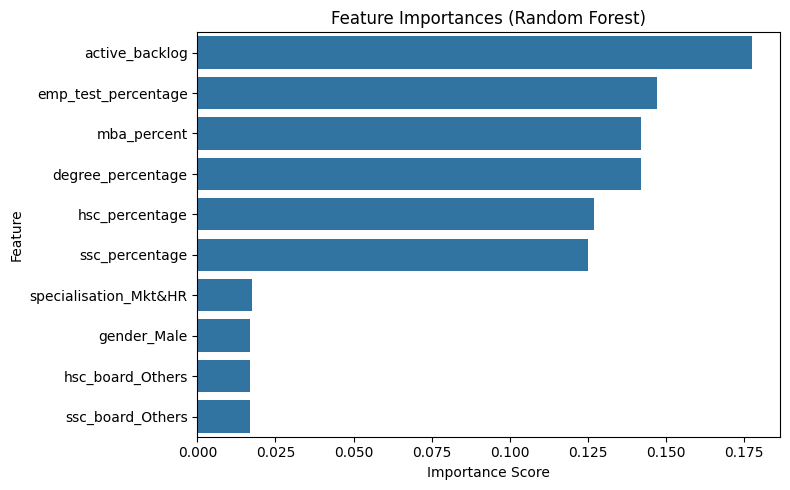

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_


feat_imp = pd.DataFrame({
    "Feature": feature_columns,
    "Importance": importances
})

feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    data=feat_imp.head(10),
    x="Importance",
    y="Feature"
)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
